<a href="https://colab.research.google.com/github/jr735/EC414HWFolder/blob/master/EC414_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Linear Binary Classification Methods
by Junyu Liu and Brian Kulis

**Due date**: March 3, Wednesday by 11:59pm

**Late** due date: March 6, Saturday by 11:59pm

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner.

**Submission instructions:** please upload your completed solution file as well as a scan of any handwritten answers to Gradescope by the due date (see Schedule).

This homework is scored out of 100.


**Important:** unless otherwise specified, you should **NOT** use loops. This is not to say loops are always bad, but avoiding them should help you:
1.   get more familiar with common language features and libraries
2.   write more efficient code
3.   "think in higher dimensions" (get more comfortable with vectors, matrices, etc.)

## **Question 1:** Creating a Dataset (10 points)

For this assignment, we will create a simple linearly-separable dataset for binary classification. We have provided you with the code to generate the feature vectors. Notice that one class has significantly more samples than the other.

**Important:** Although this dataset has only 1 feature, **ALL** the code you write in this assignment should be able to run as intended with more features. The only exception is where you are producing plots. Many functions you need to write will be tested for compatibility with more features in question 5.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

In [2]:
# Do NOT change
rng = default_rng(1)
x1 = rng.uniform(-4, 2, 460)
x2 = rng.normal(5, np.sqrt(3), 40)

### Problem a. (4 points)
We need to create appropriate labels for the two classes. x1 is the feature vectors of the negative class and x2 the positive class. Also produce a colored feature-label scatter plot (the negative class should be blue and the positive class should be red).

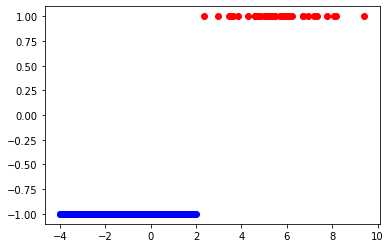

In [3]:
# WRITE CODE HERE: 
poslabel=np.ones(x2.shape)
neglabel=-1*np.ones(x1.shape)
plt.scatter(x1,neglabel,c='blue')
plt.scatter(x2,poslabel,c='red')

### Problem b. (3 points)
Combine the data into X and y, and then perform a 75-25 train-test split. Use 32 as the random_state.

Hint: X has to be a 2D array, so you need to use reshape at some point.

In [4]:
# WRITE CODE HERE
from sklearn.model_selection import train_test_split
X=np.concatenate((x1, x2))
y=np.concatenate((neglabel,poslabel))
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=32)
xtrain=np.reshape(xtrain, (375,1))
xtest=np.reshape(xtest, (125,1))
print(xtrain.shape,"\n",ytrain.shape,"\n",xtest.shape,"\n",ytest.shape,"\n")


(375, 1) 
 (375,) 
 (125, 1) 
 (125,) 



### Problem c. (3 points)
To conveniently account for the bias term in later parts, we will also store the feature vectors in extended form (each feature vector appended with 1). Apply this to both X_train and X_test.

In [5]:
#WRITE CODE HERE:

onestr=np.ones(len(xtrain))
oneste=np.ones(len(xtest))
Xtr_ext = np.append(xtrain,onestr)
Xte_ext = np.append(xtest,oneste)
print(Xtr_ext.shape,Xte_ext.shape)
Xtr_ext=np.reshape(Xtr_ext, (375,2))
Xte_ext=np.reshape(Xte_ext, (125,2))
print(Xtr_ext.shape,"\n",Xte_ext.shape,"\n")


(750,) (250,)
(375, 2) 
 (125, 2) 



## **Question 2:** OLS Regression for Binary Classification (20 points)

In class, we talked about one way to implement clasification is to use one of the linear regression methods we learned. We will investigate how to use OLS for binary classification and see how it performs.

### Problem a. (3 points)

When OLS takes a feature vector, it gives you a real-valued scalar. Assuming OLS works well (i.e., it gives a value close to the binary label (either -1 or 1) for most of the samples), how can you translate the value into the label? Suggest a simple method.

Hint: we talked about this in class

**You simply choose the label that is closest in value to the scalar OLS generates.**

### Problem b. (7 points)
For simplicity, we will use the OLS implementation from sklearn whose documentation can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Fit the model to X_train, y_train and then extract w and b. You should do so by using get_wOLS_ext, which you need to complete. Note that the function should return a single vector, which is the regular w vector with the bias term appended to it.

Lastly, create the following plot:
* a scatter plot of the training data overlayed by the OLS solution. For this, You can assume that X_train has only one feature.

Hint: w is the coeficient and b is the intercept.

wOlS_ext: (375,) xtrain: (375, 1) Xtr_ext: (375, 2)


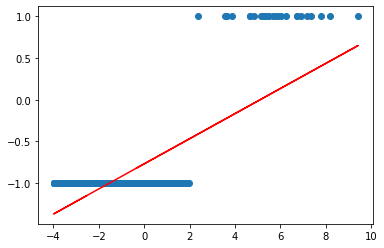

In [6]:
from sklearn.linear_model import LinearRegression
# WRITE CODE HERE: 
# DO NOT assume that X has only one feature
def get_wOLS_ext(X, y):
    model = LinearRegression().fit(X,y)
    wOLS_ext=model.predict(X)
    w=model.coef_
    b=model.intercept_
    return wOLS_ext,w,b
    

wOLS_ext,w,b= get_wOLS_ext(xtrain, ytrain)
print("wOlS_ext:", wOLS_ext.shape, "xtrain:", xtrain.shape, "Xtr_ext:", Xtr_ext.shape)


from matplotlib import pyplot as plt

plt.scatter(xtrain[:,0],ytrain,marker='o')
plt.plot(xtrain, wOLS_ext, color='red')




### Problem c. (6 points)

Complete the linear_binary_predict function to predict the labels of the test set using the OLS solution from part a. Also complete compute_CCR and report the correct classification rate (CCR).

linear_binary_predict takes Xext, a matrix of extended feature vectors, and wext, an extended weight vector; it performs linear binary classification and returns a vector of predicted binary labels.

compute_CCR takes Xext, wext, along with y, the expected binary labels to compute CCR. It should make use of linear_binary_predict.

Note: 
*   We assume Xext to be row-major, meaning each row is a sample.
*   Do not change the function prototype of linear_binary_predict. This also applies to all other functions we ask you to complete
*   The OLS from sklearn has a builtin predict function. We are asking you to complete linear_binary_predict instead of using the builtin predict because linear_binary_predict will be important for later parts.

Hint: use the idea from part a.



(125, 2) (125, 1) (1, 125)
The test CCR using OLS is 0.104


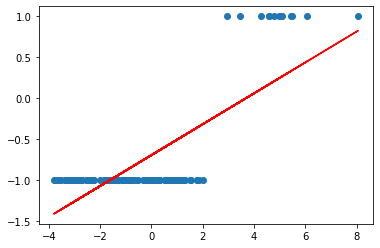

In [50]:
# WRITE CODE HERE:
wext,w,b = get_wOLS_ext(xtest,ytest)
plt.scatter(xtest[:,0],ytest,marker='o')
plt.plot(xtest, wext, color='red')


def linear_binary_predict(Xext, wext):
    val=wext*Xext+b
    ypred=np.zeros(len(val))
    for i in range(len(val)):
      if any(val[i])>=0:
        ypred[i]=1
      elif val[i]<0:
        ypred[i]=-1
    return ypred

def compute_CCR(Xext, wext, y):
    correct=0
    ypred=linear_binary_predict(Xext,wext)
    for i in range(len(ypred)):
      if ypred[i]==y[i]:
        correct+=1
    CCR=correct/len(ypred)
    return CCR

wext=np.reshape(wext,(125,1))
print(Xte_ext.shape,wext.shape,wext.transpose().shape)
CCR = compute_CCR(Xte_ext,wext,ytest)
print("The test CCR using OLS is", CCR)

### Problem d. (4 points)
Explain why CCR is not a good metric in this case. Suggest an alternative that better captures the performance of OLS on this dataset.


**CCR is a bad metric because it doesn't penalize guesses based on how far off they are. Also, because wext*Xext is negative if the commuting elements are of opposite sign, that automatically means the label is -1. Likewise if they are of the same sign, the label is 1. This seems like it contributes to the high error rate.**

## **Question 3:** Fisher's Linear Discriminant (27 points)
Fisher's Linear Discriminant is a method that takes d dimensional feature vectors and projects them into 1 dimension, and it tries to do so in a fashion where the resulting 1D values are well-separated by class. Here our d happens to be 1, but as mentioned above, the code you write needs to be able to accomodate higher dimensions for full credit.

### a. Separate the training set by class (4 points)

Write a function seperate that takes the inputs X, y and separates X based on y.

For full credit, create a vectorized implementation (no for loops).

In [128]:
def separate(X, y):
    # WRITE CODE HERE:
    X1= list(filter(lambda x: all(x<0), X))
    X2=list(filter(lambda x: all(x>=0), X))
# X1 should be of the negative class, and X2 the positive class
    X1=np.asarray(X1)
    X2=np.asarray(X2)
    return X1, X2

X1, X2 = separate(xtrain, ytrain)
print(X1.shape,X2.shape)




(243, 1) (132, 1)


### b. Calculate mean vectors (4 points)
Write a function get_means that takes the inputs X1, X2 and calculates the mean vectors of the two classes.

For full credit, create a vectorized implementation (no for loops).

In [129]:
def get_means(X1, X2):
    # WRITE CODE HERE:
    m1 = np.mean(X1)*np.ones(len(X1))
    m1=np.reshape(m1,(len(X1),1))
    m2 = np.mean(X2)*np.ones(len(X2))
    m2=np.reshape(m2,(len(X2),1))
    return m1, m2 

m1, m2 = get_means(X1, X2)


### c. Calculate within-class covariance (5 points)
$S_w$, the total within-class covariance matrix, is a d by d matrix given by $S_1 + S_2$ where $S_1 = \sum_{x_i \in X_1}(x_i-m_1)^T(x_i-m_1) = (X_1-m_1)^T(X_1-m_1)$. 

Write a function get_Sw that takes the inputs X1, X2, m1, m2 and calculates Sw.

For full credit, create a vectorized implementation.

**Note:** depending on the schema of the dataset (row-major vs column-major), the formula to use might differ slightly from those on the lecture slides. We assume row-major (each sample is a row) here, as many public datasets are organized this way.

In [130]:
def get_Sw(X1, X2, m1, m2):
    # WRITE CODE HERE:
    S1=np.matmul(np.transpose(X1-m1),(X1-m1))
    S2=np.matmul(np.transpose(X2-m2),(X2-m2))
    if S1.shape==(0,0):
      Sw=S2
    elif S2.shape==(0,0):
      Sw=S1
    else:
      Sw=S1+S2
    return Sw

Sw = get_Sw(X1, X2, m1, m2)
print(Sw)


[[897.15315416]]


### d. Calculate $w_{FLD}$ and $b_{FLD}$ (5 points)
Write a function get_wFLD_ext that takes the inputs Sw, m1, m2 and calculates the extended $w_{FLD}$.

Recall that in class we mentioned the average of the averages of the two classes after the linear transformation can serve as the bias term. However, since we want the outputs of $Xw + b$ on the two classes to be roughly separated by 0, we actually want the effect of adding b to be the same as subtracting that average. Thus, use $b = -(m_1w + m_2w)/2$.

For full credit, create a vectorized implementation, and do not use the inverse function.


In [131]:
def get_wFLD_ext(Sw, m1, m2):
    # WRITE CODE HERE: 
    m1=np.reshape(np.mean(X1),(1,1))
    m2=np.reshape(np.mean(X2),(1,1))
    w=np.linalg.solve(Sw,(m2-m1))
    b=-(m1@w+m2@w)/2
    wFLD_ext=np.append(w,b)
    return wFLD_ext

wFLD_ext = get_wFLD_ext(Sw, m1, m2)
print(wFLD_ext)

[ 4.45939543e-03 -4.92920465e-05]


### e. Evaluation (4 points)

First, create a plot of the FLD solution using the training set. Then use the compute_CCR function that you wrote earlier to get the FLD CCR on the test set.

The test CCR using FLD is 0.104


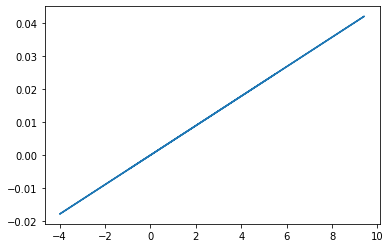

In [51]:
# WRITE CODE HERE: 
plt.plot(X,wFLD_ext[0]*X+wFLD_ext[1])
CCR = compute_CCR(Xte_ext,wFLD_ext,ytest)
print("The test CCR using FLD is", CCR)

### f. Reflection (5 points)
Recall that in class we noted that OLS and FLD can be equivalent under certain situations. Is that the case here? If not, briefly comment on why they performed differently.

The OLS and FLD solutions were the same in this situation.

## **Question 4:** An algorithm using SGD (33 points)
Let us consider a different linear classifier in this problem, one based on the idea of an $\textit{error}$ function minimization problem, similar to what we studied with linear regression, but whose error function is more tailored to the classification problem.

The form of our linear classifier is $h_{\bf{w}}(\bf{x}) = \mbox{sgn}(\bf{w}^T \bf{x})$, where $sgn$ is the sign function (so $1$ if $\bf{w}^T \bf{x} \geq 0$ and $-1$ otherwise).  We are assuming here that we have padded the inputs with an extra dimension of $1$ to account for the bias term in the linear function, as we did with linear regression.

In the binary classification case, each target class $y_i$ is either $1$ or $-1$.  One possible error function to use would say that the error is 0 if our linear classifier agrees with the target label (i.e. $y_i = \mbox{sgn}(\bf{w}^T \bf{x}_i$)), and if our linear classifier predicts the incorrect class ($y_i \neq \mbox{sgn}(\bf{w}^T \bf{x}_i$)), then the error will be given by $|\bf{w}^T \bf{x}_i|$---intuitively, we penalize more for predictions that are farther from being predicted correctly.

**Note:** the analytical parts of this question assume column feature vectors. However, you should still assume row feature vectors in the coding parts for consistency with our datasets.

### Problem a. (5 points)
Show that, for each training point, this error function may be concisely written as

$L_i(\bf{w}) = \max(0, -y_i \bf{w}^T \bf{x}_i)$.

When $y_{i}w^Tx_{i}$ is positive and the classifier assigns a label of 1, that means there is no error, i.e. the loss is zero. When $y_{i}w^Tx_{i}$ is positive and the classifier assigns a label of -1, the error is $w^Tx_{i}$. 

Likewise, if $y_{i}w^Tx_{i}$ is negative and the classifier assigns a label of -1, that means there is no error, i.e. the loss is zero; when $y_{i}w^Tx_{i}$ is negative and the classifier assigns a label of 1, the error is $w^Tx_{i}$.

Mathematically, this is summarized by the function $L_{i}(w)=max(0,-y_{i}w^Tx_{i})$

### Problem b. (5 points)
We will compute the total loss over the training data as the sum of the $L_i$ losses, namely

$L(\bf{w}) = \sum_{i=1}^n \max(0, -y_i \bf{w}^T \bf{x}_i)$.

Note that one reason we chose this particular loss function is that it is continuous (unlike the 0-1 loss).  Furthermore, it has a simple sub-gradient.  The sub-gradient of the loss at 0 is 0, and everywhere else it is equal to the gradient.  Show that the sub-gradient is equal to
$\nabla_{\bf{w}} L_i = 
\begin{cases}
0 & h_{\bf{w}} \mbox{ classifies $\bf{x}_i$ correctly}\\
-y_i \bf{x}_i & h_{\bf{w}} \mbox{ classifies $\bf{x}_i$ incorrectly.}
\end{cases}$

The sub gradient is just a piecewise (so as not to include non-differentiable points in the original function) derivative with respect to a certain variable. Here, the variable is w. To the right of x=0, L(w)=0 and $\frac{d}{dw}0=0$ To the left of x=0, L(w)=$-y_{i}w^Tx_{i}$ and $\frac{d}{dw}(-y_{i}w^Tx_{i})=-y_{i}x_{i}$

### Problem c. (5 points)
Using a batch size of 1 and a step size of 1, write down the update rule for stochastic (sub)-gradient descent to minimize $L(\bf{w})$.

$\alpha=1$ 

$w_{i+1}=w_i-\alpha\nabla_wL_i=w_i+y_ix_i$

### Problem d. (12 points)
Now it's time to implement the actual algorithm using the update rule we derived from part c. 

1.   Complete the one_pass function, which iterates over the entire Xext and y once, updating w in the process. (6 points)
2.   Go over the training set twice (2 epochs) to get your final w, which you can do by calling one_pass twice in the get_wSGD function. Then report the CCR on the test set. (6 points)

Note:
* You should always shuffle the training set before each pass.
* The first shuffle has already been performed by train_test_split, so you do not need to do a shuffle before the first pass here.
* You can get rid of the one_pass function if you think it's better to incorporate it into get_wSGD, but you must keep get_wSGD.

In [77]:
from sklearn.utils import shuffle

def one_pass(Xext, y, w):
    n = Xext.shape[0]
    for i in range(n):
            grad =-y[i]*Xext[i]
            w = w-grad
    return w

def get_wSGD(Xext, y):
    Xext,y= shuffle(Xext,y,random_state=0)
    w_in=one_pass(Xext,y,w)
    wSGD=one_pass(Xext,y,w_in)
    return wSGD


wSGD = get_wSGD(Xtr_ext, ytrain)
CCR = compute_CCR(xtest,wSGD,ytest)
print("The test CCR using SGD is", CCR)


The test CCR using SGD is 0.104


### Problem e. (6 points)

The result you get from the previous part is likely not ideal. And if you change the random_state used for shuffling in the previous part (remember to change it back to 0 if you try this), you should see large swings in CCR. This is a common phenomenon when using SGD naively, and we will see this again in question 5.

Recall from part c that we are using a fixed step size of 1, which is way too large for you to converge to a local minimum consistently. 

In practice, a technique called learning rate decay is commonly used with SGD. Essentially, the step size gets smaller after each iteration. This allows you to "learn fast" in the beginning and also be able to converge to a local minimum later when you are close to one.

We will use an initial learning rate (step size) of 1 and the inverse square root decay, which means the step size at iteration $t$ is $\frac1{\sqrt t}$.

Note:
* $t$ starts at 1, not 0; otherwise, you will get a division by 0
* You can get rid of the one_pass2 function if you think it's better to incorporate it into get_wSGD2.

In [78]:
from sklearn.utils import shuffle
import math

def one_pass2(Xext, y, w, t):
    n = Xext.shape[0]
    for i in range(n):
        lrn_rate=1/math.sqrt(t)
        grad =-lrn_rate*y[i]*Xext[i]
        w = w-grad
        t=t+1

def get_wSGD2(Xext, y):
    Xext,y= shuffle(Xext,y,random_state=0)
    w_in=one_pass(Xext,y,w)
    wSGD2=one_pass(Xext,y,w_in)
    return wSGD2


t=1
wSGD2 = get_wSGD2(Xtr_ext, ytrain)
CCR = compute_CCR(xtest,wSGD2,ytest)
print("The test CCR using SGD with decay is", CCR)

The test CCR using SGD with decay is 0.104


## **Question 5:** Testing the above methods on a real-world dataset (10 points)
No code is required for this part. Getting part a to run correctly is not required for part b.

The purpose of this question is to compare the three (four if you count SGD with decay as a separate one) methods on a real-world dataset. We will use the famous Iris dataset created by Sir Ronald Fisher (the same Fisher as in Fisher's Linear Discriminant). It contains feature measurements of 150 samples from three *Iris* flower species. We will combine two of the classes into a single negative class and the remaining class is the positive class. 

### Problem a. (6 points)
Run the cells below. The code for this part is provided to you, but it requires several earlier functions to be properly implemented to run. They need to be able to handle data with multiple features.

You will be graded on how well the behavior of this part matches our expectation. Do NOT modify the code provided here; if you have issues running it, check the code you wrote in previous parts.

In [111]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize

iris = load_iris()

# Split data into feature vectors and labels
X = iris.data
y = iris.target
# change the label values for binary classification
y[:100] = -1
y[100:] = 1

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.25)
Xtr_ext = np.c_[X_train, np.ones(X_train.shape[0])]
Xte_ext = np.c_[X_test, np.ones(X_test.shape[0])]

In [132]:
wOLS,w,b = get_wOLS_ext(X_train, y_train)
wext=np.reshape(np.append(w,b),(5,1))
print(wext.shape,Xte_ext.shape,y_test.shape)
CCR = compute_CCR(Xte_ext, Xte_ext@wext, y_test)
print("The test CCR using OLS is", CCR)

X1, X2 = separate(X_train, y_train)
m1, m2 = get_means(X1, X2)
Sw = get_Sw(X1, X2, m1, m2)
print(Sw.shape,m2.shape)
wFLD_ext = get_wFLD_ext(Sw, m1, m2)
CCR = compute_CCR(Xte_ext, wFLD_ext, y_test)
print("The test CCR using FLD is", CCR)

wSGD = get_wSGD(Xtr_ext, y_train)
CCR = compute_CCR(Xte_ext, wSGD, y_test)
print("The test CCR using SGD is", CCR)

wSGD2 = get_wSGD2(Xtr_ext, y_train)
CCR = compute_CCR(Xte_ext, wSGD2, y_test)
print("The test CCR using SGD with decay is", CCR)

(5, 1) (38, 5) (38,)
The test CCR using OLS is 0.2631578947368421
(4, 4) (112, 1)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

### Problem b. (4 points)
A class containing sub-classes is quite common in real-world classifications. One direct effect of this is that within such a class, the feature vectors tend to be quite spread out (in distinct clusters). Comment on the effect this may have on OLS and FLD.

Hint: If the previous part runs correctly, you should see OLS and FLD perform worse than the SGD algorithm from problem 4e. 

OLS and FLD may tend to treat subclasses as unique classes.